# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$Q(w) = (y - Xw)^T(y - Xw).$$

Здесь $X\in \mathbb{R}^{\ell \times d}$ — матрица <<объекты-признаки>>\ для обучающей выборки, $y~\in~\mathbb{R}^\ell$ — вектор значений целевой переменной на обучающей выборке,~$w \in \mathbb{R}^d$~— вектор параметров. Выпишем дифференциал функции ошибки по $w$:

\begin{multline*}
dx_w Q = dx_w[(y - Xw)^T(y - Xw)] = \\ = dx_w[(y - Xw)^T] (y - Xw) + (y - Xw)^Tdx_w[(y - Xw)] = \\ = dx_w[(-Xw)^T] (y - Xw) - (y - Xw)^TXdx w = \\ = - dx w^T X^T (y - Xw) - (y - Xw)^TXdx w = -2 (y - Xw)^TX dx. = -2(X^T(y-Xw))
\end{multline*}

$\displaystyle\nabla{Q}{\left({w}\right)} = -{2}{\left({X}^{T}{\left({y}-{X}{w}\right)}\right)}$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum Descent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [100]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of descents failed: Traceback (most recent call last):
  File "/home/owner/Documents/DEV/ML/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/owner/Documents/DEV/ML/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/owner/Documents/DEV/ML/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/owner/Documents/DEV/ML/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/home/owner/Documents/DEV/ML/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 319, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95469993/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95563347/


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

sns.set(font_scale=0.75)

In [ ]:
data = pd.read_csv('autos.csv')

<Axes: xlabel='price', ylabel='Count'>

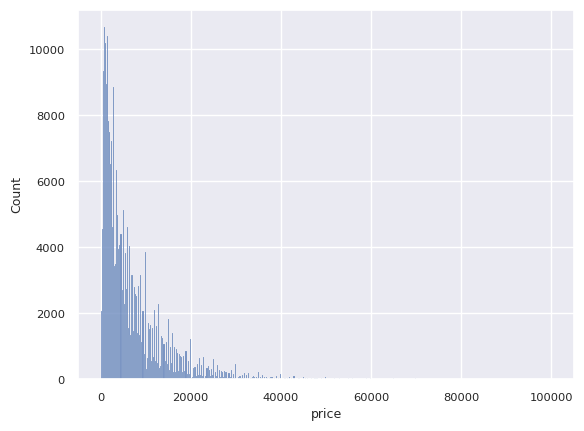

In [ ]:
sns.histplot(data.price)

<Axes: xlabel='price', ylabel='Count'>

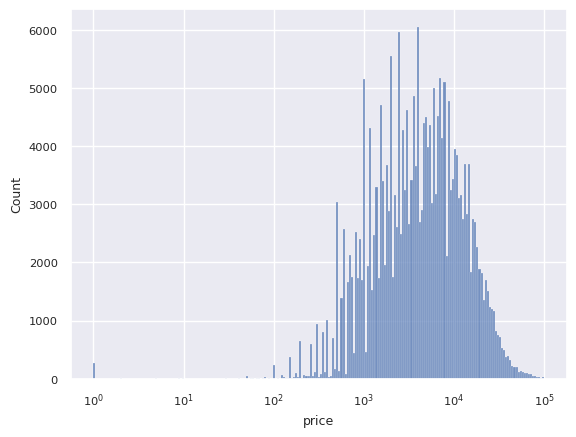

In [ ]:
sns.histplot(data.price, log_scale=True)

Логарифмирование таргета куда лучше подойдет модели

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'volkswagen'),
  Text(1, 0, 'skoda'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'peugeot'),
  Text(4, 0, 'mazda'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'renault'),
  Text(7, 0, 'ford'),
  Text(8, 0, 'mercedes_benz'),
  Text(9, 0, 'honda'),
  Text(10, 0, 'fiat'),
  Text(11, 0, 'mini'),
  Text(12, 0, 'smart'),
  Text(13, 0, 'audi'),
  Text(14, 0, 'alfa_romeo'),
  Text(15, 0, 'subaru'),
  Text(16, 0, 'mitsubishi'),
  Text(17, 0, 'hyundai'),
  Text(18, 0, 'opel'),
  Text(19, 0, 'seat'),
  Text(20, 0, 'lancia'),
  Text(21, 0, 'porsche'),
  Text(22, 0, 'citroen'),
  Text(23, 0, 'toyota'),
  Text(24, 0, 'kia'),
  Text(25, 0, 'chevrolet'),
  Text(26, 0, 'dacia'),
  Text(27, 0, 'suzuki'),
  Text(28, 0, 'daihatsu'),
  Text(29, 0, 'chrysler'),
  Text(30, 0, 'volvo'),
  Text(31

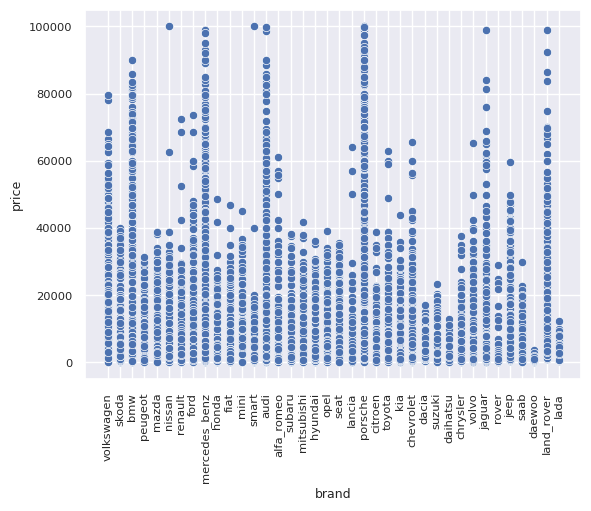

In [ ]:
sns.scatterplot(data = data, y = 'price', x = 'brand')
plt.xticks(rotation = 90)

In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
#  bool values as categorical because it will give the same result
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

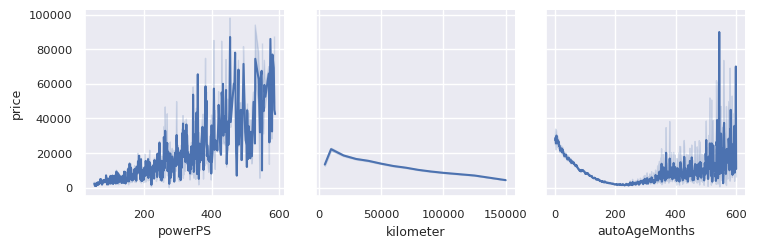

In [ ]:
g = sns.PairGrid(data = data, y_vars='price', x_vars=numeric)
g.map(sns.lineplot)

<Axes: xlabel='kilometer', ylabel='Count'>

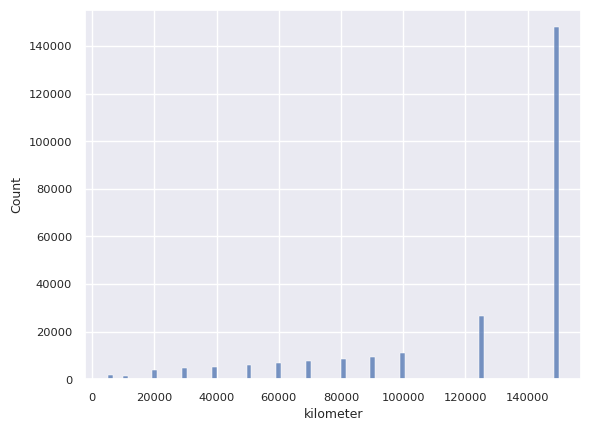

In [ ]:
sns.histplot(data['kilometer'])

Авто, у которых эта пробег < 20000, несущественны в силу малого количества, к тому же, цены крайне нехарактерно себя проявляют на них - чем меньше пробег, тем выше цена, но она низка до определенного километража

<Axes: xlabel='powerPS', ylabel='Count'>

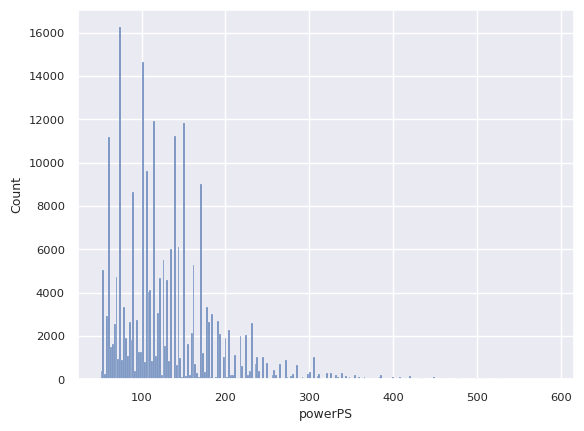

In [ ]:
sns.histplot(data['powerPS'])

<Axes: xlabel='autoAgeMonths', ylabel='Count'>

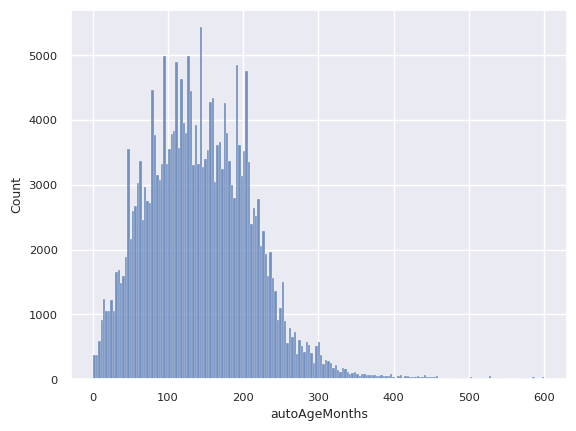

In [ ]:
sns.histplot(data['autoAgeMonths'])

Здесь можем избавиться от тех машин, у которых эта фича > 300

In [ ]:
data = data[(data['kilometer']  > 2000) & (data['autoAgeMonths'] < 300)]

Добавим логарифмированный таргет

In [ ]:
data['log_price'] = np.log1p(data['price'])

/tmp/ipykernel_5785/2447182385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log1p(data['price'])


In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
#  bool values as categorical because it will give the same result
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

/tmp/ipykernel_5785/1484939408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bias'] = 1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# only works with sparse = False
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
]).set_output(transform='pandas')

x = column_transformer.fit_transform(x)
display(x.shape)
display(y.shape)

(235419, 307)

(235419,)

In [ ]:
# YOUR CODE (data split into train/val/test):
# from sklearn.cross_decomposition import train_test
# https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
x_train, x_validate, x_test = np.split(x.sample(frac=1, random_state=42), [int(.8*len(x)), int(.9*len(x))])
y_train, y_validate, y_test = np.split(y.sample(frac=1, random_state=42), [int(.8*len(y)), int(.9*len(y))])

/home/owner/Documents/DEV/ML/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/owner/Documents/DEV/ML/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
print(x_validate.shape, y_validate.shape)

(23542, 307) (23542,)


In [104]:
# YOUR CODE:
from linear_regression import LinearRegression
from descents import LossFunction
from descents import R_square

descent_config = {
    'descent_name': 'name',
    'kwargs': {
        'dimension': len(x_validate.columns),
    }
}

statistics = pd.DataFrame(columns=['descent', 'iteration', 'error'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
  descent_config['descent_name'] = descent_name
  iterations = 0
  min_err = np.inf
  best_lr = 0
  best_R_2 = 0
  for lr in np.logspace(-5, -1,4):
    descent_config['kwargs']['lambda_'] = lr
    model = LinearRegression(
      descent_config=descent_config,
      max_iter=100000
    ).fit(x_validate, y_validate)

    curr_err = model.calc_loss(x_validate, y_validate)
    if curr_err < min_err:
      min_err = curr_err
      best_lr = lr
      iterations = model.epoch
      best_R_2 = R_square(y_test, model.predict(x_test))
    statistics.loc[len(statistics)] = [descent_name, model.epoch, curr_err]
  print("For {} gradient descent the best lambda is {} with MSE = {} for {} iterations and R^2 = {}".format(descent_name, best_lr, min_err, iterations, best_R_2))

For full gradient descent the best lambda is 0.1 with MSE = 0.5095109088531953 for 12 iterations and R^2 = 0.6121387197186745
For stochastic gradient descent the best lambda is 0.1 with MSE = 0.5973990258531858 for 34 iterations and R^2 = 0.5433799701040336
For momentum gradient descent the best lambda is 0.1 with MSE = 0.5454369518806037 for 14 iterations and R^2 = 0.5872700442760475
For adam gradient descent the best lambda is 0.1 with MSE = 0.2403229208281377 for 114 iterations and R^2 = 0.816929860932817


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

<Axes: xlabel='iteration', ylabel='error'>

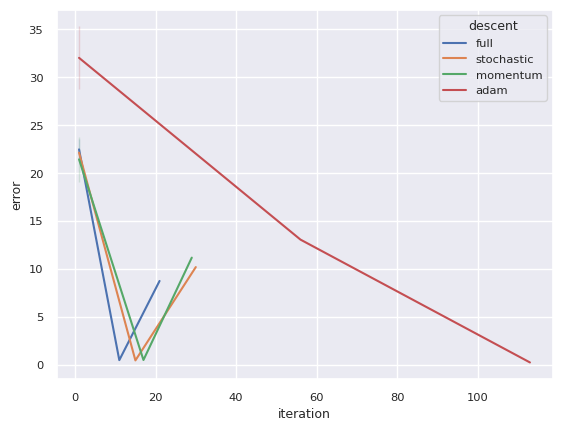

In [ ]:
# YOUR CODE:
sns.lineplot(data = statistics, x = 'iteration', y = 'error', hue = 'descent')

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
batch_sizes = np.arange(5, 500, 10)
statistics = pd.DataFrame(columns=['batch_size', 'epochs', 'error', 'time'])

import time
# YOUR CODE:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': len(x_validate.columns),
        'batch_size': 0,
        'lambda_': 0.1
    }
}
for b_s in batch_sizes:
    descent_config['kwargs']['batch_size'] = b_s
    for k in range(10):
        start = time.time()
        model = LinearRegression(
            descent_config=descent_config,
            max_iter=10000
        ).fit(x_validate, y_validate)
        waited = time.time() - start

        curr_err = model.calc_loss(x_validate, y_validate)
        statistics.loc[len(statistics)] = [b_s, model.epoch, curr_err, waited]

display(statistics.groupby('batch_size').mean())

,epochs,error,time
batch_size,,,
5.0,57.7,0.534912,1.707472
15.0,44.7,0.491307,1.309233
25.0,33.0,0.534441,0.934124
35.0,30.0,0.500991,0.885556
45.0,25.4,0.502465,0.745393
55.0,26.1,0.522713,0.762522
65.0,24.8,0.519358,0.715138
75.0,22.2,0.539967,0.642674
85.0,22.4,0.552212,0.644913


<Axes: xlabel='batch_size', ylabel='epochs'>

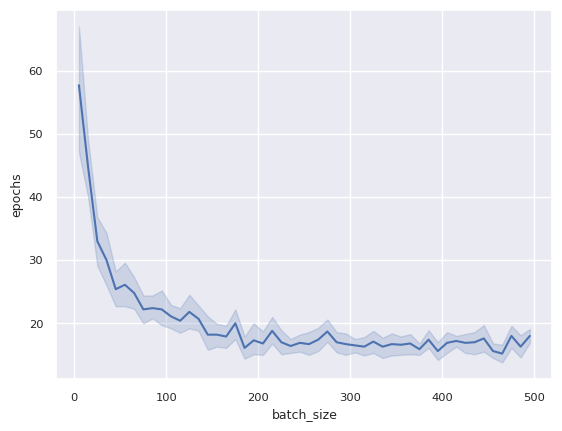

In [ ]:
sns.lineplot(data = statistics, x = 'batch_size', y = 'epochs')

<Axes: xlabel='batch_size', ylabel='error'>

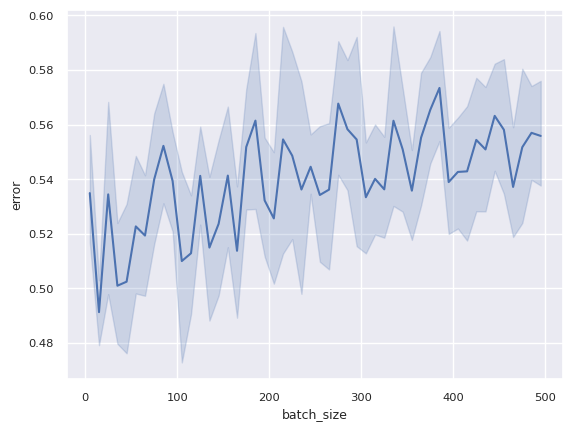

In [ ]:
sns.lineplot(data = statistics, x = 'batch_size', y = 'error')

<Axes: xlabel='batch_size', ylabel='time'>

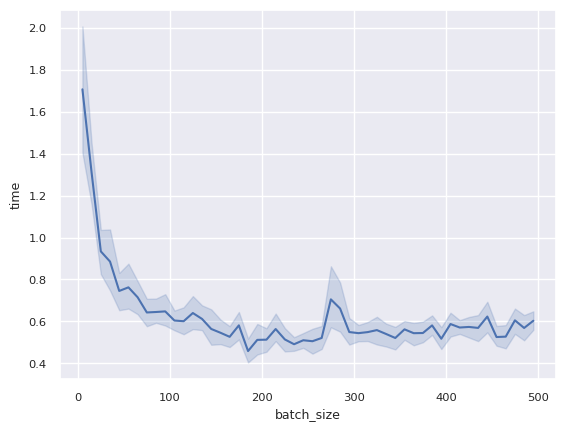

In [ ]:
sns.lineplot(data = statistics, x = 'batch_size', y = 'time')

При малом размере батча алгоритм работает дольше, но с большей точностью по итогу. 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:
from linear_regression import LinearRegression
import descents

descent_config = {
    'descent_name': 'name',
    'kwargs': {
        'dimension': len(x_validate.columns)
    }
}

statisticsVanilla = pd.DataFrame(columns=['descent', 'R^2', 'error', 'lr'])
statisticsStochastic = pd.DataFrame(columns=['descent', 'R^2', 'error', 'lr'])
statisticsMomentum = pd.DataFrame(columns=['descent', 'R^2', 'error', 'lr'])
statisticsAdam = pd.DataFrame(columns=['descent', 'R^2', 'error', 'lr'])


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
  descent_config['descent_name'] = descent_name
  iterations = 0
  min_err = np.inf
  best_lr = 0
  for lr in np.logspace(-5, -1,4):
    descent_config['kwargs']['lambda_'] = lr
    descent_config['regularized'] = True
    
    for mu in np.logspace(-5, -1, 4):
      descent_config['kwargs']['mu'] = mu
      model = LinearRegression(
          descent_config=descent_config,
          max_iter=10000
      ).fit(x_validate, y_validate)

      curr_err = model.calc_loss(x_validate, y_validate)
      y_p = model.predict(x_test)
      R_2 = descents.R_square(y_test, y_p)
      
      
      if isinstance(model.descent, descents.StochasticDescent):
        statisticsStochastic.loc[len(statisticsStochastic)] = [model.descent.__class__, R_2, curr_err, lr]
      elif isinstance(model.descent, descents.MomentumDescent):
        statisticsMomentum.loc[len(statisticsMomentum)] = [model.descent.__class__, R_2, curr_err, lr]
      elif isinstance(model.descent, descents.Adam):
        statisticsAdam.loc[len(statisticsAdam)] = [model.descent.__class__, R_2, curr_err, lr]
      elif isinstance(model.descent, descents.VanillaGradientDescent):
        statisticsVanilla.loc[len(statisticsVanilla)] = [model.descent.__class__, R_2, curr_err, lr]
      
    descent_config['regularized'] = False
    descent_config['kwargs'].pop('mu')
    
    model = LinearRegression(
        descent_config=descent_config,
        max_iter=10000
    ).fit(x_validate, y_validate)
    
    curr_err = model.calc_loss(x_validate, y_validate)
    y_p = model.predict(x_test)
    R_2 = descents.R_square(y_test, y_p)
    
    if isinstance(model.descent, descents.StochasticDescent):
      statisticsStochastic.loc[len(statisticsStochastic)] = [model.descent.__class__, R_2, curr_err, lr]
    elif isinstance(model.descent, descents.MomentumDescent):
      statisticsMomentum.loc[len(statisticsMomentum)] = [model.descent.__class__, R_2, curr_err, lr]
    elif isinstance(model.descent, descents.Adam):
      statisticsAdam.loc[len(statisticsAdam)] = [model.descent.__class__, R_2, curr_err, lr]
    elif isinstance(model.descent, descents.VanillaGradientDescent):
      statisticsVanilla.loc[len(statisticsVanilla)] = [model.descent.__class__, R_2, curr_err, lr]
    


<Axes: xlabel='lr', ylabel='error'>

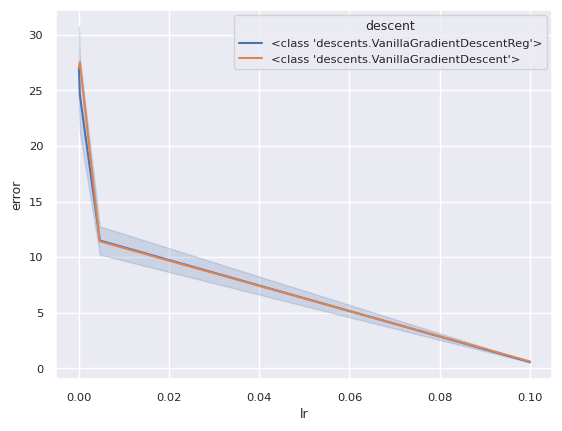

In [ ]:
sns.lineplot(data = statisticsVanilla, y = 'error', x = 'lr', hue = 'descent')

<Axes: xlabel='lr', ylabel='error'>

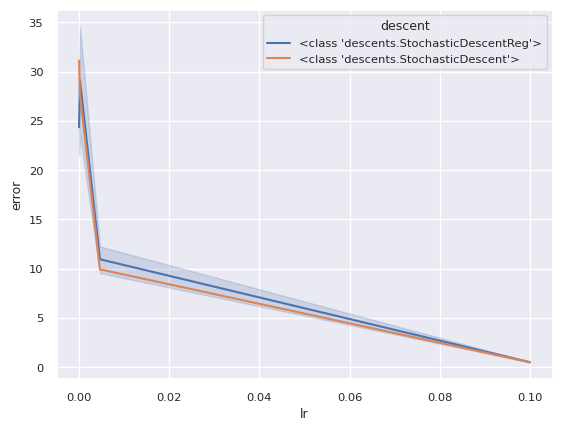

In [ ]:
sns.lineplot(data = statisticsStochastic, y = 'error', x = 'lr', hue = 'descent')

<Axes: xlabel='lr', ylabel='error'>

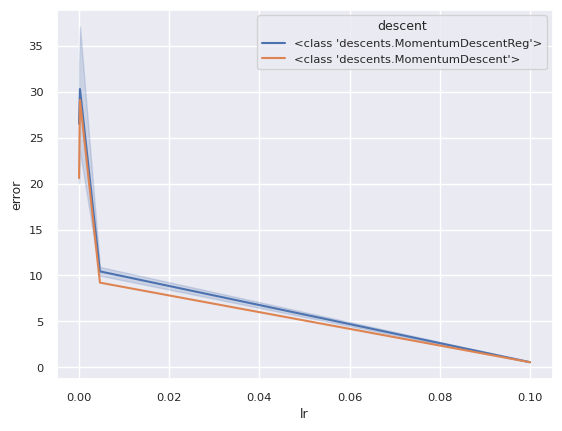

In [ ]:
sns.lineplot(data = statisticsMomentum, y = 'error', x = 'lr', hue = 'descent')

<Axes: xlabel='lr', ylabel='error'>

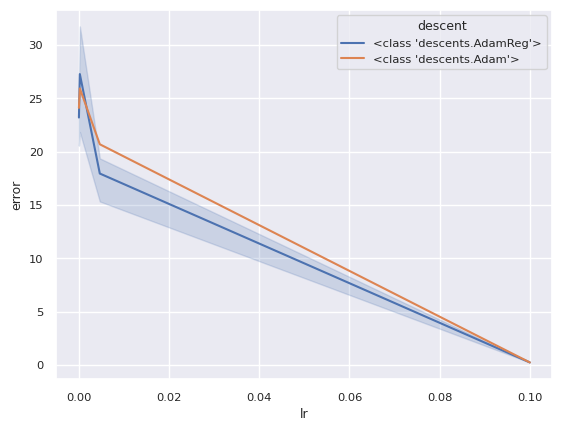

In [ ]:
sns.lineplot(data = statisticsAdam, y = 'error', x = 'lr', hue = 'descent')

При разных запусках графики ведут себя по-разному в силу рандомности выбора стартовой точки (я устал разбираться с контестом и не планирую проверять все точки рандомности кода), но в целом видно, что подобранный mu может как ухудшить изначальный результат, так и улучшить. Отдельно отмечу, что инерция гасит большую часть влияния регуляризации

Две мои последние  клетки мозга впитывают файлы по мл в надежде понять почему контест меня отвергает в 4 утра


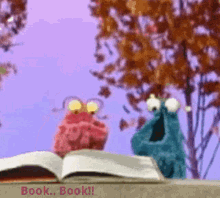

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$\displaystyle\frac{{{d}{L}}}{{{d}{w}}}=- \tanh{{\left({y}-{x}\cdot{w}\right)}}\cdot{x}^{T}$

$\displaystyle\nabla{L}=-{x}\cdot{ \tanh{{\left({y}-{x}\cdot{w}\right)}}}$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [106]:
# YOUR CODE:
from linear_regression import LinearRegression
from descents import LossFunction
from sklearn.metrics import r2_score


descent_config = {
    'descent_name': 'name',
    'kwargs': {
        'dimension': len(x_validate.columns),
        'loss_function': LossFunction.LogCosh
    }
}

statistics = pd.DataFrame(columns=['descent', 'iteration', 'error'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
  descent_config['descent_name'] = descent_name
  iterations = 0
  min_err = np.inf
  best_lr = 0
  best_R_2 = 0,
  for lr in np.logspace(-5, -1,4):
    descent_config['kwargs']['lambda_'] = lr
    model = LinearRegression(
      descent_config=descent_config,
      max_iter=100000
    ).fit(x_validate, y_validate)

    curr_err = model.calc_loss(x_validate, y_validate)
    if curr_err < min_err:
      min_err = curr_err
      best_lr = lr
      iterations = model.epoch
      best_R_2 = R_square(y_test, model.predict(x_test))
    statistics.loc[len(statistics)] = [descent_name, model.epoch, curr_err]
  print("For {} gradient descent the best lambda is {} with LogCosh = {} for {} iterations and R^2 = {}".format(descent_name, best_lr, min_err, iterations, best_R_2))

For full gradient descent the best lambda is 0.1 with LogCosh = 0.5097650191142349 for 40 iterations and R^2 = -0.1325880856990056
For stochastic gradient descent the best lambda is 0.1 with LogCosh = 0.2242598409533696 for 26 iterations and R^2 = 0.5409734914306419
For momentum gradient descent the best lambda is 0.1 with LogCosh = 0.38675897318379204 for 32 iterations and R^2 = 0.2162699567271359
For adam gradient descent the best lambda is 0.1 with LogCosh = 0.08464753358880782 for 115 iterations and R^2 = 0.8170736380809616


### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [78]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [79]:
# YOUR CODE: